<a href="https://colab.research.google.com/github/YSindhunata/Spotify-Data-Visualization/blob/main/Spotify_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Spotify Top 100 Songs of 2010-2019

In [1]:
# Menambahkan library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from google.colab import drive

In [2]:
# Menampilkan data
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Data/Spotify_2010_2019.csv')
df.head()

Mounted at /content/drive


,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo


In [3]:
# Melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1000 non-null   object 
 1   artist         1000 non-null   object 
 2   top genre      1000 non-null   object 
 3   year released  1000 non-null   float64
 4   added          1000 non-null   object 
 5   bpm            1000 non-null   float64
 6   nrgy           1000 non-null   float64
 7   dnce           1000 non-null   float64
 8   dB             1000 non-null   float64
 9   live           1000 non-null   float64
 10  val            1000 non-null   float64
 11  dur            1000 non-null   float64
 12  acous          1000 non-null   float64
 13  spch           1000 non-null   float64
 14  pop            1000 non-null   float64
 15  top year       1000 non-null   float64
 16  artist type    1000 non-null   object 
dtypes: float64(12), object(5)
memory usage: 133.3+ KB


EDA (Exploratory Data Analysis)

In [4]:
# Mengecek apakah ada data yang kosong
df.isnull()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
999,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1001,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [5]:
# Menghapus baris yang kosong
df_cleaned = df.drop(index=[1000, 1001, 1002])
print(df_cleaned)

                                             title              artist  \
0                    STARSTRUKK (feat. Katy Perry)               3OH!3   
1                      My First Kiss (feat. Ke$ha)               3OH!3   
2                                  I Need A Dollar          Aloe Blacc   
3    Airplanes (feat. Hayley Williams of Paramore)               B.o.B   
4                Nothin' on You (feat. Bruno Mars)               B.o.B   
..                                             ...                 ...   
995                                     SICKO MODE        Travis Scott   
996                                      EARFQUAKE  Tyler, The Creator   
997                      Boasty (feat. Idris Elba)               Wiley   
998                    Strike a Pose (feat. Aitch)    Young T & Bugsey   
999      The London (feat. J. Cole & Travis Scott)          Young Thug   

       top genre  year released       added    bpm  nrgy  dnce   dB  live  \
0      dance pop         2009.0  2

In [6]:
# Mengecek apakah ada data yang duplikat
df_cleaned.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [7]:
# Menghapus data yang duplikat
df_cleaned.drop_duplicates(inplace=True)

In [8]:
# Mendeskripsikan data
df_cleaned.describe()

,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2014.390000,121.262000,69.502000,66.876000,-5.663000,17.911000,50.901000,220.406000,14.36900,10.064000,74.840000,2014.500000
std,3.241359,26.238022,15.961415,13.121921,2.025224,13.431511,21.563399,39.927677,19.45403,9.276743,8.807836,2.873719
min,1975.000000,65.000000,6.000000,19.000000,-18.000000,2.000000,4.000000,113.000000,0.00000,2.000000,35.000000,2010.000000
25%,2012.000000,100.000000,59.000000,59.000000,-7.000000,9.000000,35.000000,197.000000,2.00000,4.000000,70.000000,2012.000000
50%,2014.000000,122.000000,71.000000,68.000000,-5.000000,12.000000,50.500000,216.000000,6.00000,6.000000,76.000000,2014.500000
75%,2017.000000,134.000000,81.250000,75.000000,-4.000000,23.000000,68.000000,237.000000,19.00000,12.000000,81.000000,2017.000000
max,2021.000000,206.000000,98.000000,96.000000,-1.000000,83.000000,97.000000,688.000000,98.00000,53.000000,95.000000,2019.000000


Data Visualization

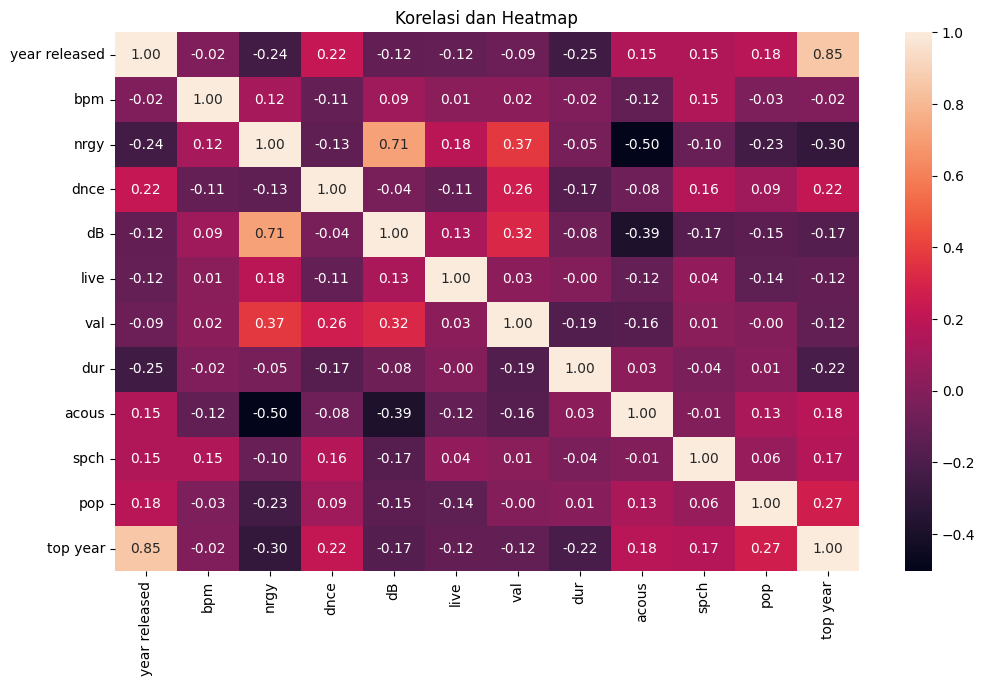

In [9]:
# Menghitung korelasi dan menampilkan heatmap
# Memilih hanya kolom numerik
df_numeric = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi
corr = df_numeric.corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(12, 7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Korelasi dan Heatmap')
plt.show()

In [10]:
# Membuat Histogram untuk feature musik
fig=make_subplots(rows=3,cols=3,subplot_titles=('<i>popularity', '<i>danceability', '<i>energy', '<i>loudness', '<i>speechiness', '<i>acousticness', '<i>liveness', '<i>valence', '<i>tempo'))
fig.add_trace(go.Histogram(x=df['pop'],name='popularity'),row=1,col=1)
fig.add_trace(go.Histogram(x=df['dnce'],name='danceability'),row=1,col=2)
fig.add_trace(go.Histogram(x=df['nrgy'],name='energy'),row=1,col=3)
fig.add_trace(go.Histogram(x=df['dB'],name='loudness'),row=2,col=1)
fig.add_trace(go.Histogram(x=df['spch'],name='speechiness'),row=2,col=2)
fig.add_trace(go.Histogram(x=df['acous'],name='acousticness'),row=2,col=3)
fig.add_trace(go.Histogram(x=df['live'],name='liveness'),row=3,col=1)
fig.add_trace(go.Histogram(x=df['val'],name='valence'),row=3,col=2)
fig.add_trace(go.Histogram(x=df['bpm'],name='tempo'),row=3,col=3)
fig.update_layout(height=900,width=900,title_text='<b>Feature Distribution')
fig.update_layout(template='plotly_dark',title_x=0.5)

In [11]:
# Menampilkan jumlah lagu berdasarkan genre
fig=px.histogram(df.groupby('top genre',as_index=False).count().sort_values(by='title',ascending=False),x='top genre',y='title',color_discrete_sequence=['green'],template='plotly_dark',marginal='box',title='<b>Total songs based on genres</b>')
fig.update_layout(
    xaxis_title='Genres',
    yaxis_title='Songs',
    title_x=0.5
    )
fig.show()

In [12]:
# Menampilkan 20 penyanyi yang populer
fig=px.bar(df.groupby('artist',as_index=False).sum().sort_values(by='pop',ascending=False).head(20),x='artist',y='pop',color_discrete_sequence=['lightgreen'],template='plotly_dark',text='pop',title='<b>Top 20 Popular Singers')
fig.update_layout(
    xaxis_title='Singer',
    yaxis_title='Popularity (pop)',
    title_font_size=20,
    title_x=0.5
)


In [13]:
# Menampilkan lagu yang populer di spotify
fig=px.line(df.sort_values(by='pop',ascending=False).head(20),x='title',y='pop',hover_data=['artist'],color_discrete_sequence=['green'],markers=True,title='<b> Top 20 songs in Spotify')
fig.update_layout(
    xaxis_title='Title of Song',
    yaxis_title='Popularity (pop)',
    title_font_size=20,
    title_x=0.5
)
fig.show()